#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All tools loaded successfully! We're ready to start.")

All tools loaded successfully! We're ready to start.


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

#Loading the DataSet

In [3]:
df = pd.read_csv('Sales_Transactions_3500 (2).csv')

print("Data loaded successfully!")
print(f"We have {len(df)} sales records (rows)")
print(f"Each record has {len(df.columns)} pieces of information (columns)")

Data loaded successfully!
We have 3500 sales records (rows)
Each record has 12 pieces of information (columns)


In [4]:
df.head()

,OrderID,CustomerID,Gender,Age,Product,Category,Quantity,Price,TotalAmount,PaymentMethod,Region,PurchaseDate
0,O00001,C0435,Female,59.0,T-shirt,Fashion,1,369.82,369.82,MobileMoney,East,2025-03-30
1,O00002,C1337,Female,19.0,Jacket,Fashion,2,232.29,464.58,BankTransfer,North,2025-04-11
2,O00003,C0619,Male,28.0,Lipstick,Beauty,1,347.79,347.79,Cash,East,2024-07-14
3,O00004,C0033,Female,58.0,Vacuum Cleaner,Home,5,336.92,1684.60,Card,North,2024-05-24
4,O00005,C1199,Male,25.0,Smartphone,Electronics,1,85.37,85.37,MobileMoney,South,2025-05-10


In [5]:
print("\n--- Column Names ---")
print(df.columns.tolist())


--- Column Names ---
['OrderID', 'CustomerID', 'Gender', 'Age', 'Product', 'Category', 'Quantity', 'Price', 'TotalAmount', 'PaymentMethod', 'Region', 'PurchaseDate']


In [7]:
print("\n--- Data Types ---")
(df.dtypes)


--- Data Types ---


,0
OrderID,object
CustomerID,object
Gender,object
Age,float64
Product,object
Category,object
Quantity,int64
Price,float64
TotalAmount,float64
PaymentMethod,object


In [8]:
print("\n--- Quick Summary ---")
df.info()


--- Quick Summary ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderID        3500 non-null   object 
 1   CustomerID     3500 non-null   object 
 2   Gender         3500 non-null   object 
 3   Age            3106 non-null   float64
 4   Product        3500 non-null   object 
 5   Category       3500 non-null   object 
 6   Quantity       3500 non-null   int64  
 7   Price          3500 non-null   float64
 8   TotalAmount    3500 non-null   float64
 9   PaymentMethod  3500 non-null   object 
 10  Region         3500 non-null   object 
 11  PurchaseDate   3500 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 328.3+ KB


#Checking Data Quality

In [11]:
print("\n--- Missing Values Check ---")
missing = df.isnull().sum()
# missing
(missing[missing > 0])


--- Missing Values Check ---


,0
Age,394


In [13]:
if missing.sum() == 0:
    print("Great! No missing values found.")
else:
    print(f"\nTotal missing values: {missing.sum()}")
    # Show percentage
    missing_pct = (missing / len(df)) * 100
    print("\nPercentage missing:")
    print(missing_pct[missing_pct > 0].round(2))


Total missing values: 394

Percentage missing:
Age    11.26
dtype: float64


In [14]:
duplicates = df.duplicated().sum()
print(f"\n--- Duplicate Rows: {duplicates} ---")


--- Duplicate Rows: 0 ---


#Handling the Missing Values

In [15]:
df_method1 = df.dropna(subset=['Age'])
print(f"\nMethod 1 - Remove missing: {len(df_method1)} rows remaining")
print(f"   We lost {len(df) - len(df_method1)} rows")


Method 1 - Remove missing: 3106 rows remaining
   We lost 394 rows


In [16]:
average_age = df['Age'].mean()
df_method2 = df.copy()
df_method2['Age'].fillna(average_age, inplace=True)
print(f"\nMethod 2 - Fill with average: {average_age:.1f} years")
print(f"   All {len(df_method2)} rows kept")


Method 2 - Fill with average: 40.9 years
   All 3500 rows kept


In [17]:
median_age = df['Age'].median()
df_method3 = df.copy()
df_method3['Age'].fillna(median_age, inplace=True)
print(f"\nMethod 3 - Fill with median: {median_age:.1f} years")
print(f"   All {len(df_method3)} rows kept")


Method 3 - Fill with median: 41.0 years
   All 3500 rows kept


In [18]:
print("\nMethod 4 - Fill based on gender:")
avg_age_by_gender = df.groupby('Gender')['Age'].mean()
print(avg_age_by_gender.round(1))

df_method4 = df.copy()
for gender in df_method4['Gender'].unique():
    mask = (df_method4['Gender'] == gender) & (df_method4['Age'].isnull())
    df_method4.loc[mask, 'Age'] = avg_age_by_gender[gender]

print(f"   Filled missing ages based on gender averages")


Method 4 - Fill based on gender:
Gender
Female    40.6
Male      41.1
Name: Age, dtype: float64
   Filled missing ages based on gender averages


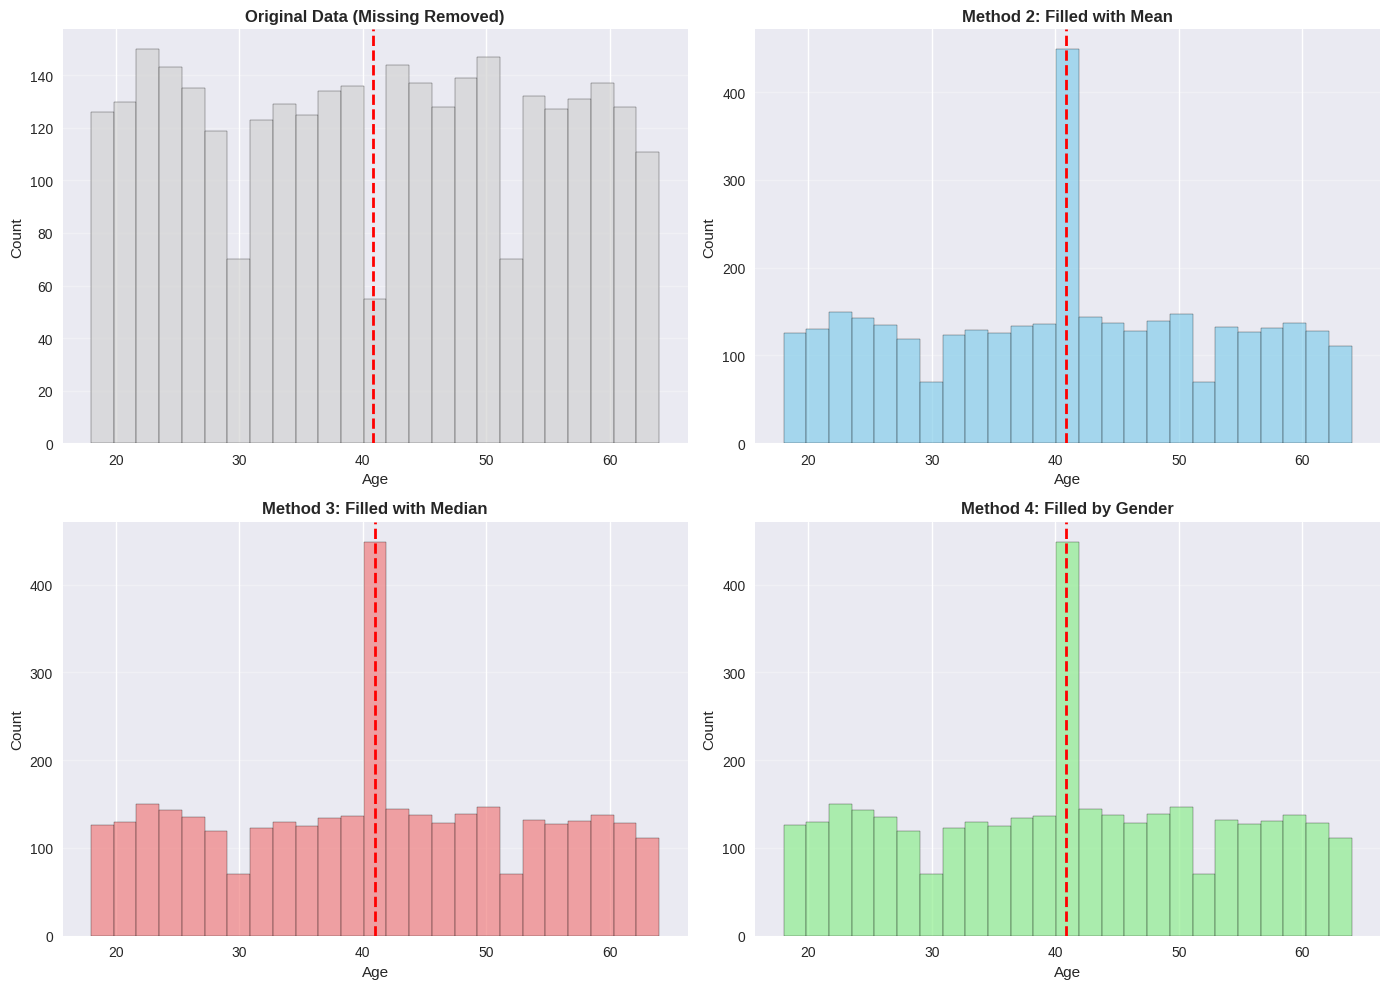

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original data (with missing removed for plotting)
axes[0, 0].hist(df['Age'].dropna(), bins=25, color='lightgray', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2)
axes[0, 0].set_title('Original Data (Missing Removed)', fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(axis='y', alpha=0.3)

# Method 2: Mean
axes[0, 1].hist(df_method2['Age'], bins=25, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(average_age, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_title('Method 2: Filled with Mean', fontweight='bold')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(axis='y', alpha=0.3)

# Method 3: Median
axes[1, 0].hist(df_method3['Age'], bins=25, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(median_age, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_title('Method 3: Filled with Median', fontweight='bold')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(axis='y', alpha=0.3)

# Method 4: Gender-based
axes[1, 1].hist(df_method4['Age'], bins=25, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(df_method4['Age'].mean(), color='red', linestyle='--', linewidth=2)
axes[1, 1].set_title('Method 4: Filled by Gender', fontweight='bold')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
df['Age'].fillna(df['Age'].median(), inplace=True)

print(f"\nMissing ages now: {df['Age'].isnull().sum()}")
print("All age values are now complete!")


Missing ages now: 0
All age values are now complete!


#Understanding Our Numbers

In [23]:
print("\n--- Summary Statistics ---")
print(df.describe().round(2))


--- Summary Statistics ---
           Age  Quantity    Price  TotalAmount
count  3500.00   3500.00  3500.00      3500.00
mean     40.88      3.01   248.33       745.76
std      12.71      1.42   143.39       587.72
min      18.00      1.00     5.20         5.25
25%      31.00      2.00   120.77       280.90
50%      41.00      3.00   249.00       575.99
75%      51.00      4.00   369.49      1110.33
max      64.00      5.00   499.90      2494.00


In [24]:
print("\n--- Price Information ---")
print(f"Average Price: ${df['Price'].mean():.2f}")
print(f"Median Price: ${df['Price'].median():.2f}")
print(f"Cheapest Item: ${df['Price'].min():.2f}")
print(f"Most Expensive Item: ${df['Price'].max():.2f}")

print("\n--- Transaction Information ---")
print(f"Average Transaction: ${df['TotalAmount'].mean():.2f}")
print(f"Total Revenue: ${df['TotalAmount'].sum():,.2f}")
print(f"Average Items per Order: {df['Quantity'].mean():.2f}")

print("\n--- Customer Information ---")
print(f"Average Customer Age: {df['Age'].mean():.1f} years")
print(f"Youngest Customer: {df['Age'].min():.0f} years")
print(f"Oldest Customer: {df['Age'].max():.0f} years")



--- Price Information ---
Average Price: $248.33
Median Price: $249.00
Cheapest Item: $5.20
Most Expensive Item: $499.90

--- Transaction Information ---
Average Transaction: $745.76
Total Revenue: $2,610,147.55
Average Items per Order: 3.01

--- Customer Information ---
Average Customer Age: 40.9 years
Youngest Customer: 18 years
Oldest Customer: 64 years


In [25]:
print("\n--- Gender Distribution ---")
print(df['Gender'].value_counts())

print("\n--- Region Distribution ---")
print(df['Region'].value_counts())

print("\n--- Product Category Distribution ---")
print(df['Category'].value_counts())

print("\n--- Payment Method Distribution ---")
print(df['PaymentMethod'].value_counts())


--- Gender Distribution ---
Gender
Female    1768
Male      1732
Name: count, dtype: int64

--- Region Distribution ---
Region
South    892
North    876
West     874
East     858
Name: count, dtype: int64

--- Product Category Distribution ---
Category
Beauty         921
Home           887
Fashion        853
Electronics    839
Name: count, dtype: int64

--- Payment Method Distribution ---
PaymentMethod
Card            903
Cash            889
BankTransfer    882
MobileMoney     826
Name: count, dtype: int64


#Visualizations

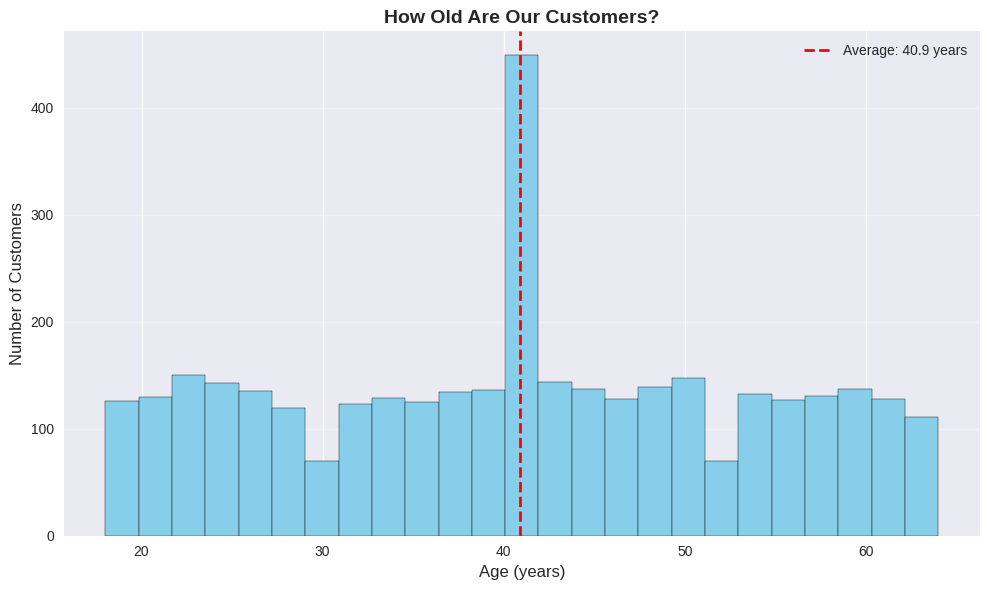

This chart shows us the age range of our customers.
The red line shows the average age.


In [26]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=25, color='skyblue', edgecolor='black')
plt.axvline(df['Age'].mean(), color='red', linestyle='--',
            linewidth=2, label=f'Average: {df["Age"].mean():.1f} years')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('How Old Are Our Customers?', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("This chart shows us the age range of our customers.")
print("The red line shows the average age.")

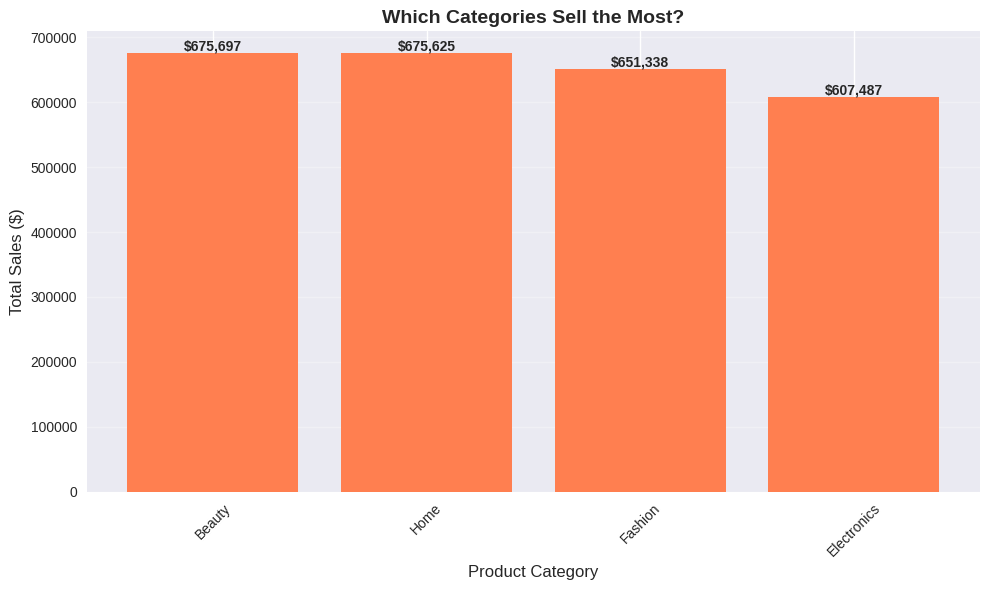

In [27]:
plt.figure(figsize=(10, 6))
category_sales = df.groupby('Category')['TotalAmount'].sum().sort_values(ascending=False)
plt.bar(category_sales.index, category_sales.values, color='coral')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Which Categories Sell the Most?', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(category_sales.values):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

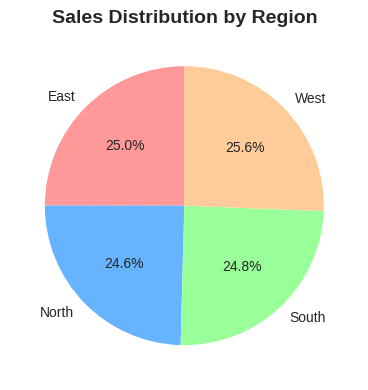

This pie chart shows what percentage of sales comes from each region.


In [28]:
plt.figure(figsize=(6, 4))
region_sales = df.groupby('Region')['TotalAmount'].sum()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Sales Distribution by Region', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("This pie chart shows what percentage of sales comes from each region.")

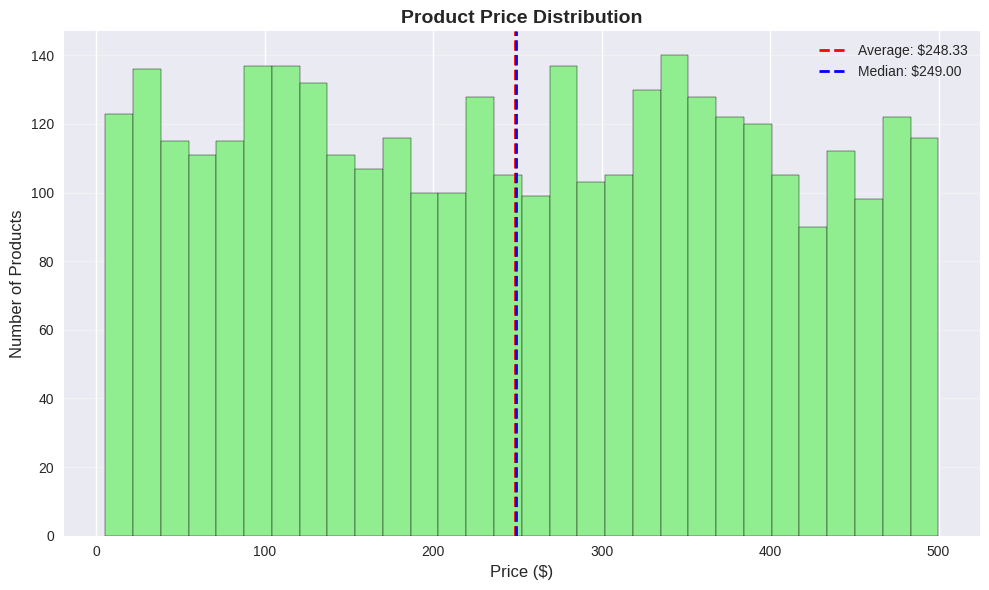

Red line = average price (mean)
Blue line = middle price (median)


In [29]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='lightgreen', edgecolor='black')
plt.axvline(df['Price'].mean(), color='red', linestyle='--',
            linewidth=2, label=f'Average: ${df["Price"].mean():.2f}')
plt.axvline(df['Price'].median(), color='blue', linestyle='--',
            linewidth=2, label=f'Median: ${df["Price"].median():.2f}')
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.title('Product Price Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Red line = average price (mean)")
print("Blue line = middle price (median)")

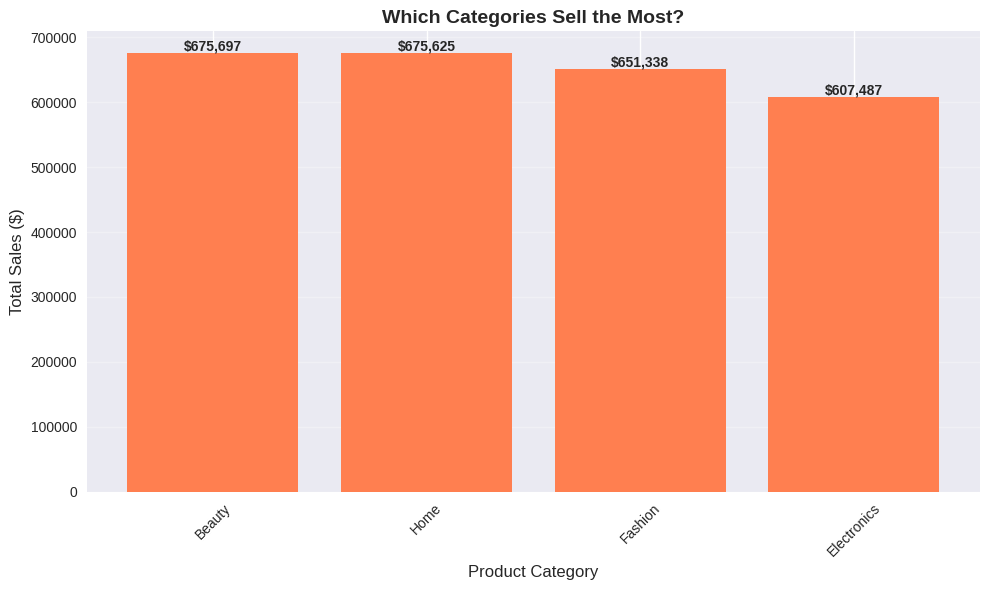

In [30]:
plt.figure(figsize=(10, 6))
category_sales = df.groupby('Category')['TotalAmount'].sum().sort_values(ascending=False)
plt.bar(category_sales.index, category_sales.values, color='coral')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Which Categories Sell the Most?', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(category_sales.values):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

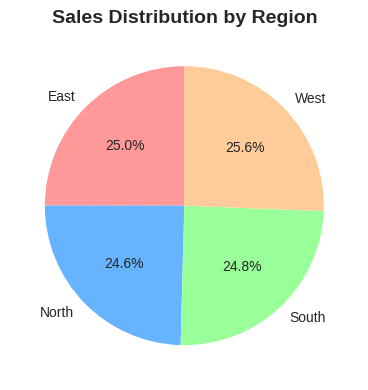

This pie chart shows what percentage of sales comes from each region.


In [31]:
plt.figure(figsize=(6, 4))
region_sales = df.groupby('Region')['TotalAmount'].sum()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Sales Distribution by Region', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("This pie chart shows what percentage of sales comes from each region.")

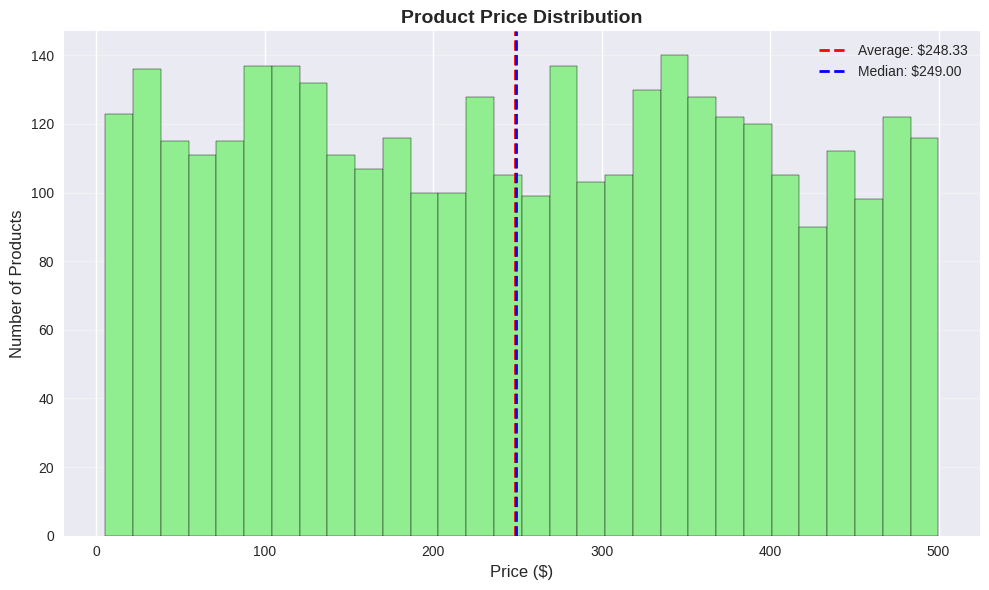

Red line = average price (mean)
Blue line = middle price (median)


In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='lightgreen', edgecolor='black')
plt.axvline(df['Price'].mean(), color='red', linestyle='--',
            linewidth=2, label=f'Average: ${df["Price"].mean():.2f}')
plt.axvline(df['Price'].median(), color='blue', linestyle='--',
            linewidth=2, label=f'Median: ${df["Price"].median():.2f}')
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.title('Product Price Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Red line = average price (mean)")
print("Blue line = middle price (median)")

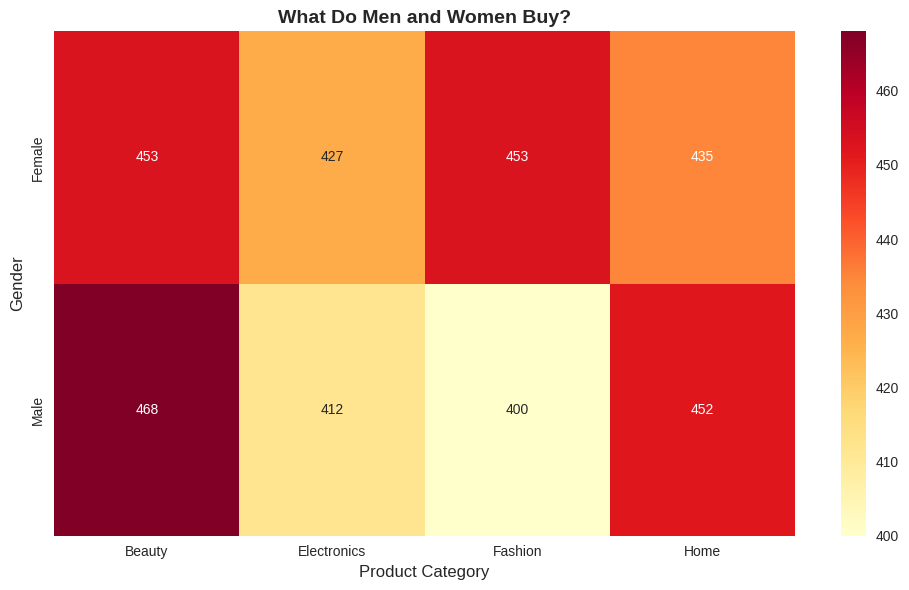

Numbers show how many purchases each gender made in each category.
Darker colors = more purchases


In [33]:
plt.figure(figsize=(10, 6))
gender_category = pd.crosstab(df['Gender'], df['Category'])
sns.heatmap(gender_category, annot=True, fmt='d', cmap='YlOrRd')
plt.title('What Do Men and Women Buy?', fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.tight_layout()
plt.show()

print("Numbers show how many purchases each gender made in each category.")
print("Darker colors = more purchases")

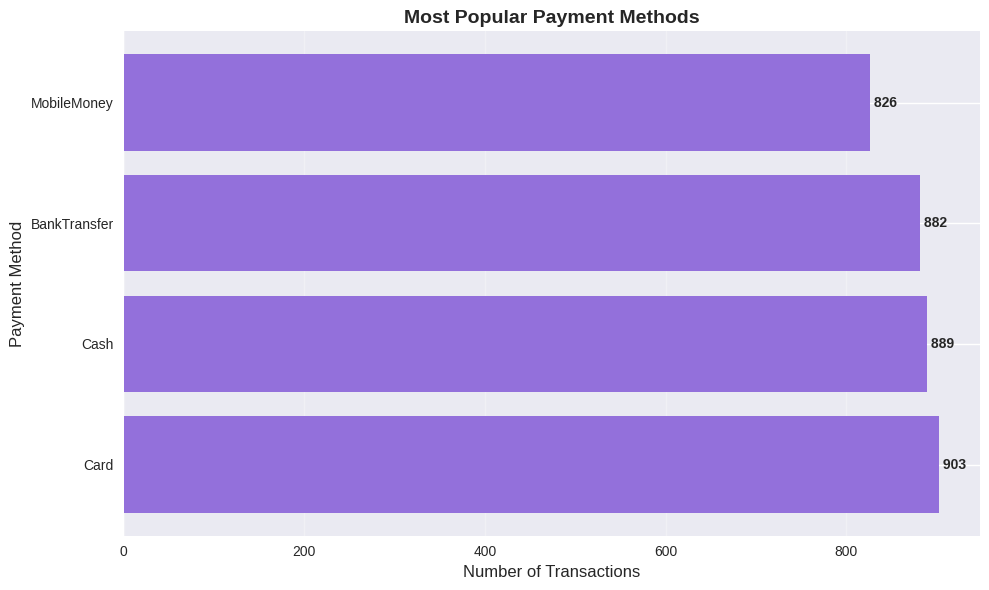

In [34]:
plt.figure(figsize=(10, 6))
payment_counts = df['PaymentMethod'].value_counts()
plt.barh(payment_counts.index, payment_counts.values, color='mediumpurple')
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Payment Method', fontsize=12)
plt.title('Most Popular Payment Methods', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(payment_counts.values):
    plt.text(v, i, f' {v}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

#Finding Interesting Patterns

In [36]:
df['Age_Group'] = pd.cut(df['Age'].dropna(),
                         bins=[0, 25, 35, 45, 55, 100],
                         labels=['18-25', '26-35', '36-45', '46-55', '56+'])

print("\n--- Sales by Age Group ---")
age_group_sales = df.groupby('Age_Group')['TotalAmount'].sum()
(age_group_sales)


--- Sales by Age Group ---


,TotalAmount
Age_Group,
18-25,420600.25
26-35,477297.81
36-45,801265.92
46-55,469231.30
56+,441752.27


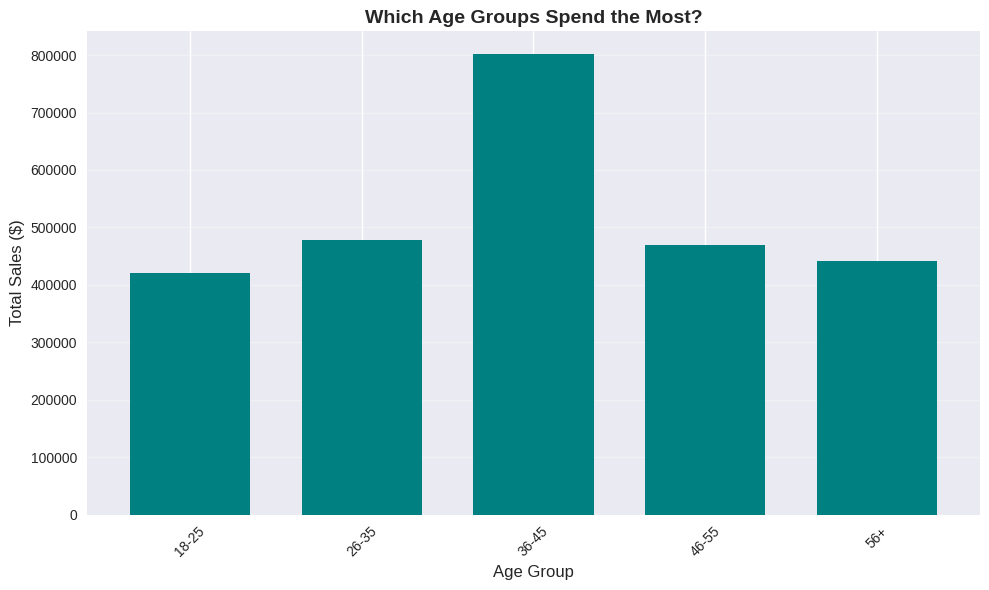

In [37]:
plt.figure(figsize=(10, 6))
age_group_sales.plot(kind='bar', color='teal', width=0.7)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Which Age Groups Spend the Most?', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [38]:
print("\n--- Category Analysis ---")
category_analysis = df.groupby('Category').agg({
    'TotalAmount': ['sum', 'mean'],
    'OrderID': 'count',
    'Quantity': 'sum'
}).round(2)
category_analysis.columns = ['Total Sales', 'Avg Sale', 'Num Orders', 'Items Sold']
category_analysis = category_analysis.sort_values('Total Sales', ascending=False)
(category_analysis)


--- Category Analysis ---


,Total Sales,Avg Sale,Num Orders,Items Sold
Category,,,,
Beauty,675697.16,733.66,921,2729
Home,675625.06,761.70,887,2666
Fashion,651338.42,763.59,853,2571
Electronics,607486.91,724.06,839,2556


#Key Findings Summary

In [39]:
print("\n" + "="*60)
print("KEY FINDINGS FROM OUR ANALYSIS")
print("="*60)

print("\n1. OVERALL BUSINESS")
print("-" * 40)
print(f"   Total Revenue: ${df['TotalAmount'].sum():,.2f}")
print(f"   Total Transactions: {len(df):,}")
print(f"   Average Sale: ${df['TotalAmount'].mean():.2f}")

print("\n3. CUSTOMER INSIGHTS")
print("-" * 40)
print(f"   Average Age: {df['Age'].mean():.1f} years")
print(f"   Gender Split:")
for gender, count in df['Gender'].value_counts().items():
    pct = (count / len(df)) * 100
    print(f"      {gender}: {pct:.1f}%")

print("\n4. PRICING")
print("-" * 40)
print(f"   Average Price: ${df['Price'].mean():.2f}")
print(f"   Price Range: ${df['Price'].min():.2f} - ${df['Price'].max():.2f}")
print(f"   Average Items per Order: {df['Quantity'].mean():.2f}")

print("\n5. REGIONAL BREAKDOWN")
print("-" * 40)
for region in df['Region'].unique():
    region_total = df[df['Region'] == region]['TotalAmount'].sum()
    region_pct = (region_total / df['TotalAmount'].sum()) * 100
    print(f"   {region}: ${region_total:,.2f} ({region_pct:.1f}%)")


KEY FINDINGS FROM OUR ANALYSIS

1. OVERALL BUSINESS
----------------------------------------
   Total Revenue: $2,610,147.55
   Total Transactions: 3,500
   Average Sale: $745.76

3. CUSTOMER INSIGHTS
----------------------------------------
   Average Age: 40.9 years
   Gender Split:
      Female: 50.5%
      Male: 49.5%

4. PRICING
----------------------------------------
   Average Price: $248.33
   Price Range: $5.20 - $499.90
   Average Items per Order: 3.01

5. REGIONAL BREAKDOWN
----------------------------------------
   East: $652,270.37 (25.0%)
   North: $641,732.68 (24.6%)
   South: $647,359.17 (24.8%)
   West: $668,785.33 (25.6%)


#End of Day Task

In [40]:
#Most Expensive Product in Each Category
print("--- Task 1: Most Expensive Product in Each Category ---")
most_expensive = df.groupby('Category')['Price'].max()
most_expensive

--- Task 1: Most Expensive Product in Each Category ---


,Price
Category,
Beauty,499.62
Electronics,499.64
Fashion,498.58
Home,499.90



--- Task 2: Average Age by Region ---
Region
East     41.10
North    41.31
South    40.93
West     40.16
Name: Age, dtype: float64


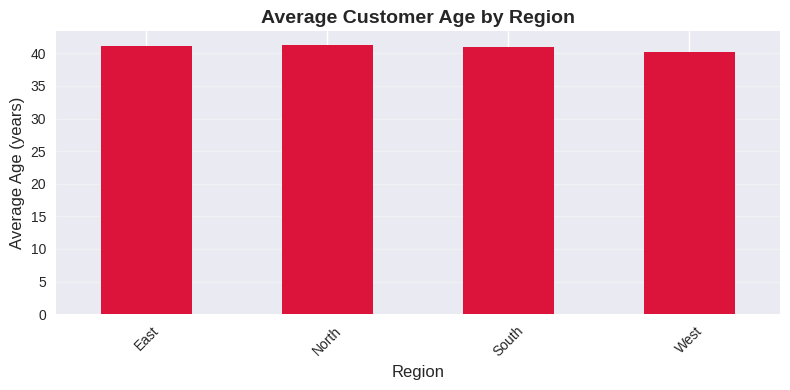

In [45]:
#Average Age by Region
print("\n--- Task 2: Average Age by Region ---")
avg_age_by_region = df.groupby('Region')['Age'].mean()
print(avg_age_by_region.round(2))
plt.figure(figsize=(8, 4))
avg_age_by_region.plot(kind='bar', color='crimson')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Age (years)', fontsize=12)
plt.title('Average Customer Age by Region', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


--- Task 3: Most Popular Category in Each Region ---
   Region Category  Count
3    East     Home    234
4   North   Beauty    224
8   South   Beauty    243
12   West   Beauty    238


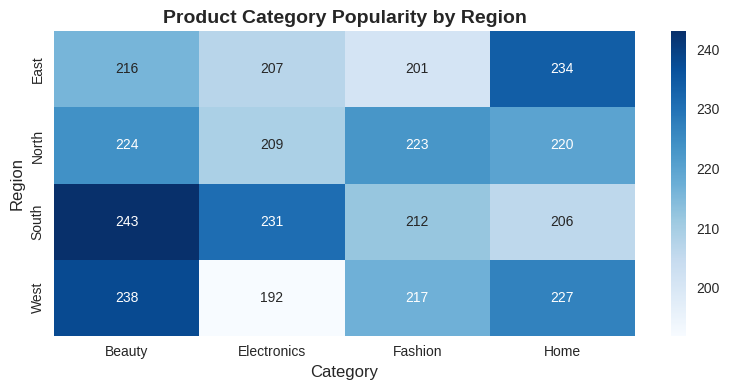

In [46]:
#Most Popular Product Category in Each Region
print("\n--- Task 3: Most Popular Category in Each Region ---")
region_category = df.groupby(['Region', 'Category']).size().reset_index(name='Count')
most_popular = region_category.loc[region_category.groupby('Region')['Count'].idxmax()]
print(most_popular)


plt.figure(figsize=(8, 4))
pivot_table = pd.crosstab(df['Region'], df['Category'])
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title('Product Category Popularity by Region', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()



--- Task 4: Average Transaction Value by Gender ---
Gender
Female    725.62
Male      766.31
Name: TotalAmount, dtype: float64

Difference: $40.69


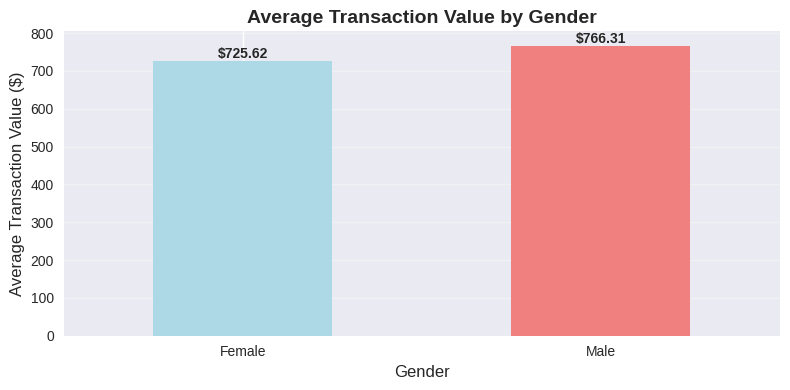

In [48]:
#Average Transaction Value Between Genders
print("\n--- Task 4: Average Transaction Value by Gender ---")
avg_transaction_by_gender = df.groupby('Gender')['TotalAmount'].mean()
print(avg_transaction_by_gender.round(2))
difference = abs(avg_transaction_by_gender['Male'] - avg_transaction_by_gender['Female'])
print(f"\nDifference: ${difference:.2f}")
plt.figure(figsize= (8,4))
avg_transaction_by_gender.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Transaction Value ($)', fontsize=12)
plt.title('Average Transaction Value by Gender', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(avg_transaction_by_gender.values):
    plt.text(i, v, f'${v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()